# Project: Investigate a Dataset (TMDb Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I will be using the TMDb Movies Dataset to complete this data analysis project. This dataset contains data on various movies collected from The Movie Database (TMDb), with information which includes cast, director, movie budgets, users rating, movie revenues among other things. 

My goal with this project is to use my understanding of data analytics to provide interesting facts and insights about the movie industry using this dataset.


### Questions
 
 Here are some of the interesting questions I intended to use this dataset to answer:
 
 1. The average movie runtime
 2. The Top movies by profit
 3. The Most and Least Profitable Movie
 4. The movies profit per year
 5. The number of movies released per year
 6. The number of movies released per Genre
 7. Popular Keywords 
 
 

In [23]:
#import the needed tools 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS


In [24]:
# load the data

tmdb_df = pd.read_csv('tmdb-movies.csv')
tmdb_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## Data Wrangling

> Data wrangling whch is also called data cleaning, data remediation, or data munging refers to a variety of processes designed to transform raw data into more readily used formats.


### General Properties

In [8]:
#check the characteristics of the dataset
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [11]:
# Check the dataset info
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [18]:
# Check the dataset dimensions
tmdb_df.shape

(10866, 21)


### Data Cleaning

**Data Cleaning Steps:**

1. Dropped the unwanted columns like *imdb_id, homepage, tagline, overview, budget_adj and revenue_adj*.
2. Dropped Duplicate data. 
3. Dropped null values.
4. Changed the format of *release_date*.
5. Separated the genre data with multiple data separated by |.
6. Created a profit column based on the revenue and budget column.


**Drop Unwanted Column**

In [17]:
# drop unwanted columns
tmdb_df.drop(['imdb_id','homepage','tagline','overview','budget_adj','revenue_adj'], axis= 1, inplace=True)

#Confirm the unwanted columns has been dropped
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   profit                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   director              10822 non-null  object 
 8   keywords              9373 non-null   object 
 9   runtime               10866 non-null  int64  
 10  genres                10843 non-null  object 
 11  production_companies  9836 non-null   object 
 12  release_date          10866 non-null  object 
 13  vote_count            10866 non-null  int64  
 14  vote_average          10866 non-null  float64
 15  release_year       

**Drop Duplicate Data**

In [19]:
# Check for duplicate 
tmdb_df.duplicated().sum()

1

In [20]:
#drop duplicate data

tmdb_df.drop_duplicates(inplace = True)

In [22]:
#confirm if duplicate data still exist
tmdb_df.duplicated().sum()

0

**Convert the format of *release_date* data**

In [25]:
#converting release date to proper datetime format
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])

In [36]:
#confirm datetime format changed
tmdb_df['release_date'].head(3)

0   2015-06-09
1   2015-05-13
2   2015-03-18
Name: release_date, dtype: datetime64[ns]

**Drop null value**

In [18]:
#Check for columns with null value
tmdb_df.isna().sum()

id                         0
popularity                 0
budget                     0
profit                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [19]:
# Drop dataset with null value
tmdb_df = tmdb_df.dropna()


# confirm that the null value has been dropped 
tmdb_df.isna().sum()

id                      0
popularity              0
budget                  0
profit                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

**Create a Profit column from budget and revenue**

In [25]:
#create a profit column to calculate the profit earned based on the budget and revenue

tmdb_df.insert(4,'profit',tmdb_df['revenue'] - tmdb_df['budget'])

In [102]:
# confirm that the profit column has been created 

tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   profit                10866 non-null  int64  
 5   revenue               10866 non-null  int64  
 6   original_title        10866 non-null  object 
 7   cast                  10790 non-null  object 
 8   homepage              2936 non-null   object 
 9   director              10822 non-null  object 
 10  tagline               8042 non-null   object 
 11  keywords              9373 non-null   object 
 12  overview              10862 non-null  object 
 13  runtime               10866 non-null  int64  
 14  genres                10843 non-null  object 
 15  production_companie

In [55]:
# Check the dataset head
tmdb_df.head()

,id,popularity,budget,revenue,profit,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: The Average Movie Runtime

In [58]:
# Calculate the average movie runtime
tmdb_df['runtime'].mean()

103.81513962612509

<AxesSubplot:ylabel='Frequency'>

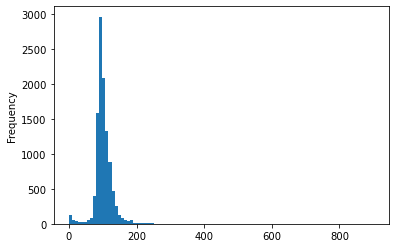

In [17]:
# Create historgram of the runtime
tmdb_df['runtime'].plot(kind='hist', bins= 100)

> From the histogram charted we can see that the average runtime of movies in this data is around 100 mins.

### Research Question 2: Top 10 Movies by Profit

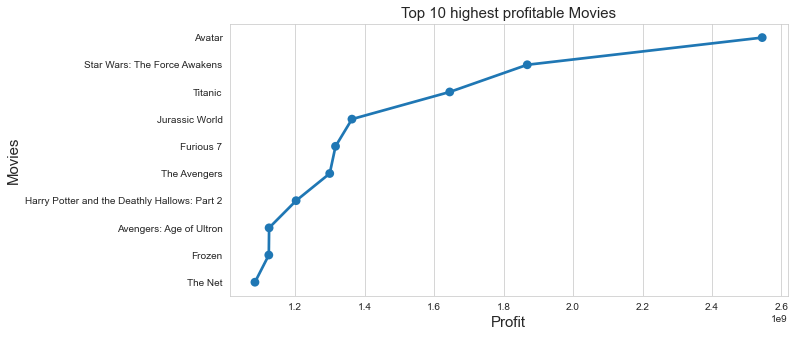

In [32]:
# plot a graph of the top 10 movies based on profit

profit_df = pd.DataFrame(tmdb_df['profit'].sort_values(ascending = False))
profit_df['original_title'] = tmdb_df['original_title']
plt.figure(figsize=(10,5));
ax = sns.pointplot(y = profit_df['original_title'][:10], x = profit_df['profit'][:10])
ax.set_title("Top 10 highest profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 15)
ax.set_ylabel('Movies', fontsize = 15)    
sns.set_style("whitegrid")

### Research Question 3: The Most and Least Profitable Movie

In [20]:
#querying movies with highest and lowest profit using the already created profit data 
lowest =  pd.DataFrame(tmdb_df.loc[tmdb_df['profit'].idxmin()])
highest = pd.DataFrame(tmdb_df.loc[tmdb_df['profit'].idxmax()])
hl = pd.concat([highest, lowest],axis=1)
hl

,1386,2244
id,19995,46528
popularity,9.432768,0.25054
budget,237000000,425000000
profit,2544505847,-413912431
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100


> The query result shows that the most profitable movie is **Avatar** with 2.5B in profit, while the least profitable movie is **The Warrior's Way** with -413M loss. 

### Research Question 4: Movies Profit per Year

Text(0, 0.5, 'profit')

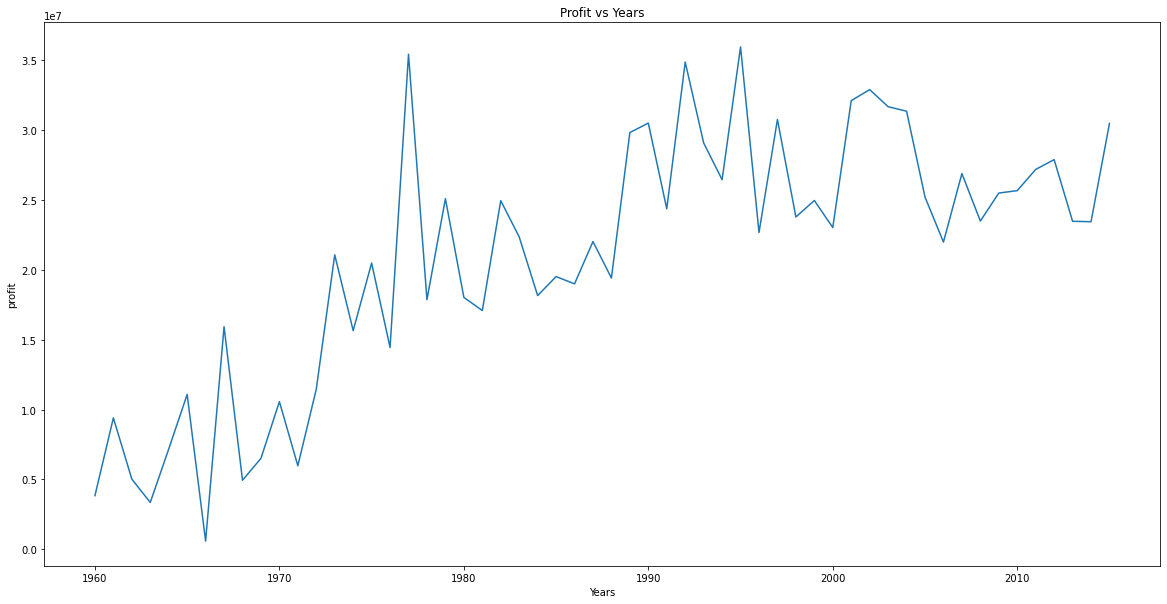

In [26]:
#How profitable is the movie industry 
#plot the relationship between years and profit
tmdb_df.groupby('release_year')['profit'].mean().plot(kind='line', title='Profit vs Years', figsize=(20,10));

#x axis label
plt.xlabel('Years')
#y axis label
plt.ylabel('profit')

> From this graph the observation is that the peak profitable year is for movies made around **1978** and **1995**.

### Research Question 5: Movies Released per Year

In [35]:
# movies released per year
movies_year = tmdb_df.groupby('release_year').count()['id']
movies_year.head(5)

release_year
1960    30
1961    28
1962    30
1963    33
1964    41
Name: id, dtype: int64

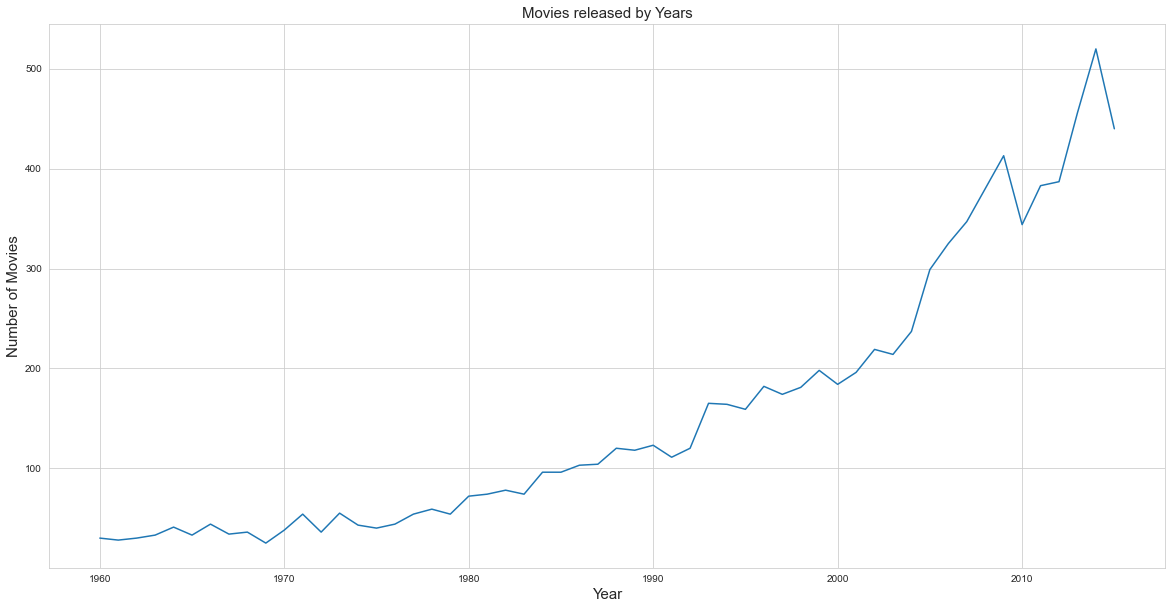

In [43]:
# plot movies released by year
plt.figure(figsize=(20, 10))
plt.plot(movies_year)

plt.title('Movies released by Years',fontsize = 15)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Number of Movies',fontsize = 15);

> We saw a steady uptrend of movies released per year which peaked few years after 2010.

### Research Question 6: The number of movies released per Genre. 

In [47]:
# create a list for the movie genres
genre_list = tmdb_df['genres'].str.split('|', expand = True)
genre_list = genre_list.apply(pd.Series.value_counts).index.tolist()
genre_list = np.array(genre_list)
print(genre_list)

['Action' 'Adventure' 'Animation' 'Comedy' 'Crime' 'Documentary' 'Drama'
 'Family' 'Fantasy' 'Foreign' 'History' 'Horror' 'Music' 'Mystery'
 'Romance' 'Science Fiction' 'TV Movie' 'Thriller' 'War' 'Western']


Text(0, 0.5, 'Genres')

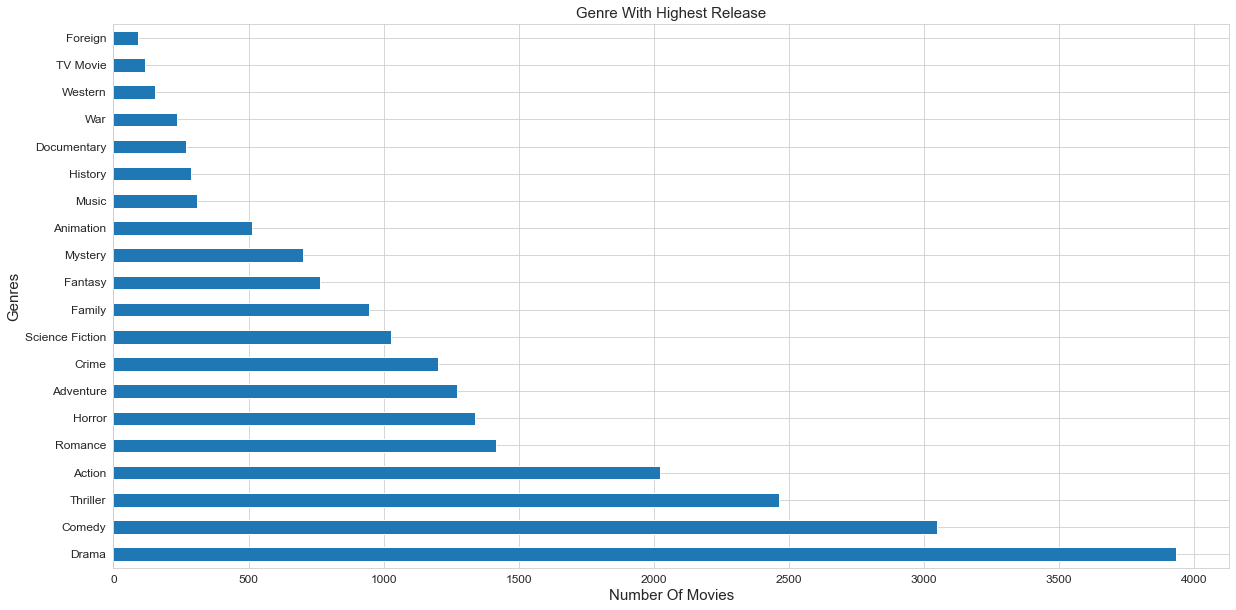

In [67]:
#make a function which split the string and return the count of each genre.
def genre_num(x):
    data_plot = tmdb_df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    info = data.value_counts(ascending=False)
    return info

#count the movies of each genre.
total_genre_movies = genre_num('genres')
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind = 'barh',figsize = (20,10),fontsize=12)

#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize = 15)
plt.xlabel('Number Of Movies',fontsize = 15)
plt.ylabel("Genres",fontsize = 15)


> From this chart, Drama, Comedy and Thriller looks to be the most popular genre with Number of Movies.

### Research Question 7:  Keywords Wordcloud

<Figure size 1080x720 with 0 Axes>

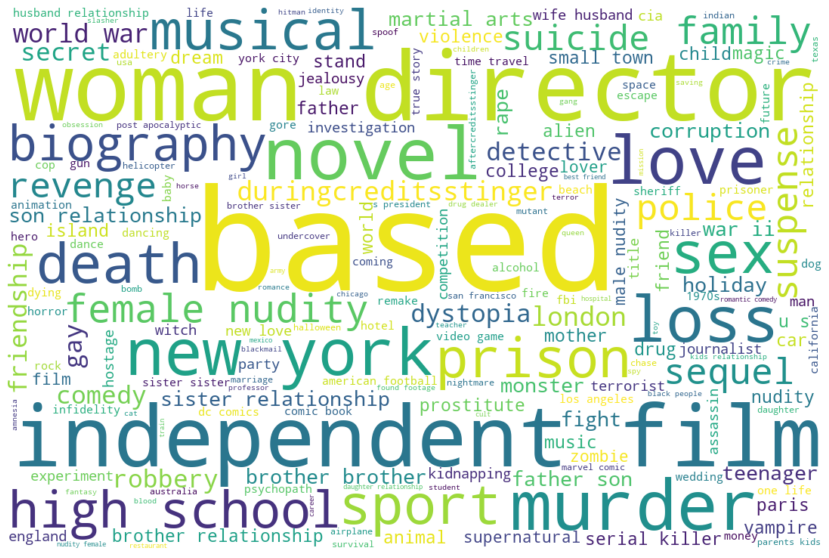

In [92]:
#create wordcloud for most used keywords
text = tmdb_df.keywords.str.cat(sep='|')
plt.figure( figsize=(15,10))
wordcloud = WordCloud (width=1080, height=720,background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

> Some notable movie keywords that appear in a lot of movies are *based, woman, biography, love, high school, murder* among other keywords.

<a id='conclusions'></a>
## Conclusions

With the use of tools like numpy, pandas, seaborn and wordcloud, the TMDb Movie dataset was fully analyzed. After cleaning the data and dropping the duplicates and missing values, I was able to query and find answers to questions such as **The Most and Least Profitable Movies**, **The Average Movie Runtime**, **Top 10 Profitable Movies**, **Number of Movies released per year**, **Movies released per Genre** among other questions.

We can therefore establish the following:

- The average movie runtime is around 100 mins.
- Avatar is the most profitable movie, while the warrior's way is the least profitable movie.
- The peak profitable year is for movies made around 1978 and 1995.
- A steady uptrend of movies released per year which peaked few years after 2010.
- Drama, Comedy and Thriller are the most popular genre with Number of Movies.


**Limitations**

Few of the limitations noticed while working on this project are:

- Possibility of data lost during data cleaning. For example some rows with vital informations might have been lost when dropped due to null value.
- The budget and revenue currency was not outrightly stated, it is hard to figure what the exact currency is maybe dollars or euros or pounds.
- The data isn't up-to-date with the current year, there are possibilities of changes and new information which might have occur within the time frame of the data provided and this current time.


## Reference

- https://stackoverflow.com/questions/54335660/how-to-make-a-cloud-of-words-in-dataframe-with-lists
- https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/#:~:text=split(),-View%20Discussion&text=Pandas%20provide%20a%20method%20to,from%20a%20single%20separated%20string.
- https://www.w3schools.com/python/pandas/pandas_plotting.asp